In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

DESCRIBE_PERCENTILES = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

In [2]:
mcu = pd.read_csv("./data/mcu.csv")

## Analyzing Line Count Distributions

### Line Count by Movie (alphabetical)

In [3]:
line_count = pd.DataFrame(mcu.groupby(["movie","character"]).line.nunique())
line_count.reset_index(inplace=True)
line_count = line_count.pivot(index="character", columns="movie", values="line")
line_count.fillna(0, inplace=True)
line_count["total"] = line_count.sum(axis=1)
line_count.loc["total"] = line_count.sum(axis=0)
line_count = line_count.astype("int64")

line_count

movie,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Captain America: The First Avenger,Captain America: The Winter Soldier,Guardians of the Galaxy Vol. 2,Iron Man,Iron Man 2,Iron Man 3,The Avengers,Thor: Ragnarok,total
character,,,,,,,,,,,,
25TH FLOOR STRIKE AGENT,0,0,0,0,1,0,0,0,0,0,0,1
4F DOCTOR,0,0,0,7,0,0,0,0,0,0,0,7
A1 CLINT BARTON,0,1,0,0,0,0,0,0,0,0,0,1
A1 HULK,0,2,0,0,0,0,0,0,0,0,0,2
A1 NATASHA,0,2,0,0,0,0,0,0,0,0,0,2
A1 STEVE,0,8,0,0,0,0,0,0,0,0,0,8
A1 THOR,0,6,0,0,0,0,0,0,0,0,0,6
A1 TONY,0,3,0,0,0,0,0,0,0,0,0,3
ABU,0,0,0,0,0,0,5,0,0,0,0,5


### Line Count by Movie (total line count)

In [4]:
line_count.sort_values(by="total", ascending=False)

movie,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Captain America: The First Avenger,Captain America: The Winter Soldier,Guardians of the Galaxy Vol. 2,Iron Man,Iron Man 2,Iron Man 3,The Avengers,Thor: Ragnarok,total
character,,,,,,,,,,,,
total,979,1216,981,686,826,966,832,987,1021,1023,940,10457
TONY STARK,179,163,128,0,0,0,310,348,388,170,0,1686
STEVE ROGERS,137,131,25,188,224,0,0,0,0,127,0,832
THOR,56,76,77,0,0,0,0,0,0,47,343,599
NATASHA ROMANOFF,81,74,15,0,116,0,0,55,0,101,3,445
PEPPER POTTS,0,16,21,0,0,0,124,157,91,30,0,439
BRUCE BANNER,83,103,49,0,0,0,0,0,7,86,66,394
PETER QUILL,0,10,82,0,0,210,0,0,0,0,0,302
JAMES RHODES,20,47,17,0,0,0,70,81,64,0,0,299


,total
count,403.000000
mean,51.895782
std,531.010404
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
90%,56.600000
95%,96.800000
99%,444.880000


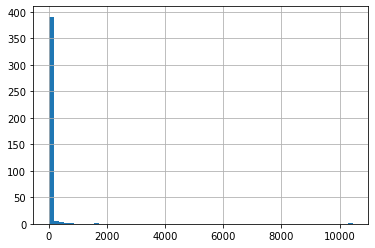

In [5]:
line_count['total'].hist(bins=60)
pd.DataFrame(line_count['total']).describe(percentiles = DESCRIBE_PERCENTILES)

## Analyzing Word Count Distributions

We might want to threshold these examples at a given number of words because it's hard to predict who said what line when the line only has few words.  The cell below provides a variable `threshold` and a table that shows how many examples are above / below the threshold number of words for each character.  The table also shows the total number of words spoken by a character in the dataset.

In [6]:
threshold = 10

above_threshold = mcu["words"] >= threshold

mcu_high_word_count = mcu[above_threshold]
mcu_low_word_count = mcu[~above_threshold]

high_word_line_count = pd.DataFrame(mcu_high_word_count.groupby("character").line.nunique())
low_word_line_count = pd.DataFrame(mcu_low_word_count.groupby("character").line.nunique())

word_count_table = high_word_line_count.join(low_word_line_count, how='outer', lsuffix=' high word count', 
                                             rsuffix=' low word count')
word_count_table.fillna(0, inplace=True)
word_count_table.columns = ["lines above threshold", "lines below threshold"]
word_count_table['total lines'] = word_count_table.sum(axis=1)
#word_count_table['% lines above threshold'] = word_count_table['lines above threshold'] / word_count_table['total lines']
#word_count_table['% lines below threshold'] = word_count_table['lines below threshold'] / word_count_table['total lines']
word_count_table = word_count_table.astype({'lines above threshold': "int64", 
                                            'lines below threshold': "int64",
                                            'total lines': "int64"})
word_count_table['total words'] = mcu.groupby(by="character").sum()['words']
word_count_table['avg words per line'] = word_count_table['total words'] / word_count_table['total lines']

word_count_table.sort_values(by='total words', inplace=True, ascending=False)

word_count_table

,lines above threshold,lines below threshold,total lines,total words,avg words per line
character,,,,,
TONY STARK,693,973,1666,19369,11.626050
STEVE ROGERS,215,605,820,6926,8.446341
THOR,215,381,596,6311,10.588926
NATASHA ROMANOFF,148,296,444,4121,9.281532
BRUCE BANNER,143,244,387,3824,9.881137
PEPPER POTTS,114,317,431,3421,7.937355
NICK FURY,119,141,260,3222,12.392308
JAMES RHODES,128,170,298,3175,10.654362
PETER QUILL,111,189,300,2916,9.720000


In [7]:
word_count_table.describe(percentiles = DESCRIBE_PERCENTILES)

,lines above threshold,lines below threshold,total lines,total words,avg words per line
count,402.000000,402.000000,402.000000,402.000000,402.000000
mean,9.360697,16.485075,25.845771,272.273632,9.224743
std,41.527586,67.907492,108.399930,1177.001147,7.980916
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,8.000000,4.525000
50%,1.000000,2.000000,3.000000,23.500000,7.860119
75%,3.000000,6.000000,9.000000,102.000000,11.000000
90%,19.000000,28.900000,54.800000,580.800000,16.052941
95%,37.950000,61.000000,93.850000,1186.900000,19.496642
99%,142.850000,295.480000,430.560000,3819.970000,33.970000


### Words per line

,words
count,10596.000000
mean,10.329747
std,12.211615
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
90%,22.000000
95%,31.000000
99%,57.050000


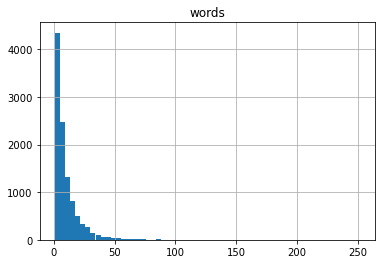

In [8]:
mcu.hist(column="words", bins=60)
pd.DataFrame(mcu["words"]).describe(percentiles = DESCRIBE_PERCENTILES)

### Total words by character

,total words
count,402.000000
mean,272.273632
std,1177.001147
min,1.000000
25%,8.000000
50%,23.500000
75%,102.000000
90%,580.800000
95%,1186.900000
99%,3819.970000


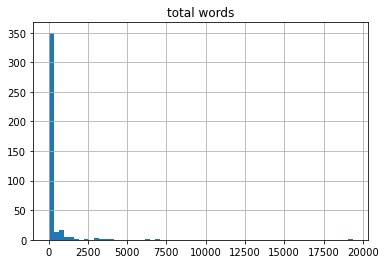

In [9]:
word_count_table.hist(column="total words", bins=60)
pd.DataFrame(word_count_table["total words"]).describe(percentiles = DESCRIBE_PERCENTILES)

## Correlation Between Word Count and Line Count

I wonder if there's a noticeable correlation between a character's `mean_word_count` and their `total_line_count`.  

**In other words, do characters with more lines have longer lines?**

Let's also correlate using `log(total_line_count)` because most characters have very few lines, but some characters have a higher number of lines.  This might make it clearer to see if there's a relationship.

In [10]:
mean_word_count = mcu.groupby('character')['words'].mean()
total_line_count = mcu.groupby('character').line.nunique()

word_line_distribution = pd.DataFrame([mean_word_count, total_line_count]).transpose()
word_line_distribution.columns = ['mean word count', 'total line count']
word_line_distribution['log(total line count)'] = np.log10(word_line_distribution['total line count'])

word_line_distribution.corr(method='pearson')

,mean word count,total line count,log(total line count)
mean word count,1.000000,0.036329,0.148849
total line count,0.036329,1.000000,0.567962
log(total line count),0.148849,0.567962,1.000000


There appears to be little correlation between `mean_word_count` and both `total_line_count` and `log(total_line_count)` (`0.137282` and `0.699299` respectively).

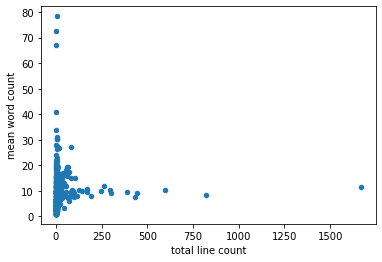

In [11]:
word_line_distribution.plot.scatter(x='total line count', y='mean word count')

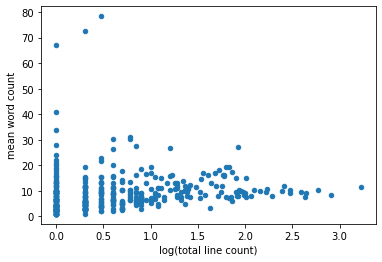

In [12]:
word_line_distribution.plot.scatter(x='log(total line count)', y='mean word count')

It appears to me that just because a character has more lines, does not mean the have longer lines.  There appears to be no strong relationship between `mean_word_count` and `total_line_count`.